## Generate Random Phase I.C.

In [22]:
from RandomPhaseGenerator1d import RandomPhase
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})

resolution = 600
number_modes = int(resolution)
debroglie_length = 1
box_size = 1
# number of dB lengths

psi0, rho0 = RandomPhase(resolution, number_modes,  debroglie_length, box_size, masked = True)

# Normalize
Sum = np.sum(rho0)
psi0 /= np.sqrt(Sum)
rho0 /= Sum
half = int(np.shape(rho0)[0]/2)
av = np.average(rho0)
# for i in range(2*half):
#     rho0[i,:] += 10*av*np.sin(i/(.001*np.pi))**2
# rho0[:,:] = 1
# rho0[half:(half+1),half:(half+1)] = 1e6*av
# rho0[:,:] = 1
delta = rho0/av-1
deltaIni= delta



print(np.std(rho0)/np.average(rho0))

print(np.shape(delta))
print(np.shape(psi0))


0.7589492993092697
(600,)
(600,)


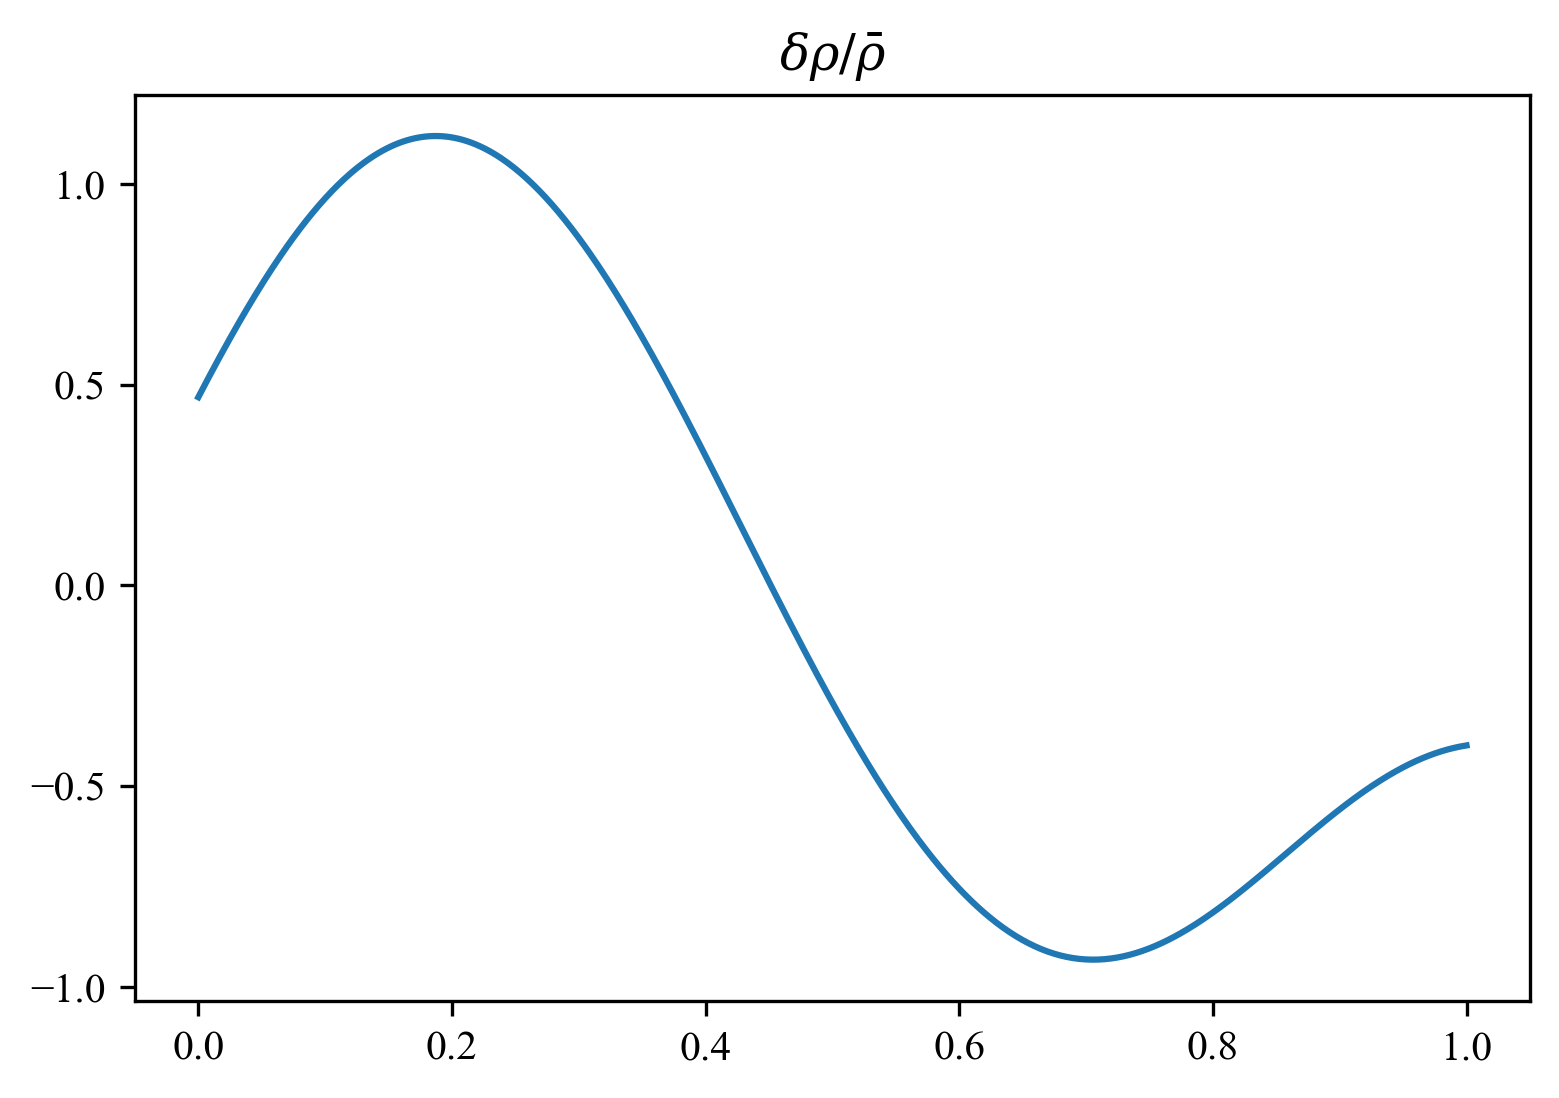

In [23]:
plt.figure(dpi=300)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.title(r"$\delta\rho/\bar{\rho}$")
plt.plot(np.linspace(0, 1, 600),deltaIni)

In [3]:
#np.savetxt("rho0_N"+str(resolution)+"1d"+".csv", rho0, delimiter="," )

## Evolve forward in time

In [37]:
from SchroPoissonSolver1d import fdmSimulation, Center
from math import floor, ceil
import numpy as np
import matplotlib.pyplot as plt

# rho0 = np.loadtxt("Simulation Runs//rho0_N400.csv", delimiter=",")

factor = 1 # can't be even int
N = int(factor*np.shape(rho0)[0])
lower = int( floor(factor/2)*N/factor)
upper = int( ceil(factor/2)*N/factor)
rho = np.zeros(N) # Make the simulation grid N times bigger than IC in each axis
#print(np.shape(rho))
rho[lower:upper] = rho0 # center the initial condition

# G_N = 0
# g_SI = 0.
norm = 2e-3
G_N = 1e7
g_SI = .1
g = g_SI*G_N #0*G_N

dt = 1/(N**(2))/np.pi  # timestep
T  = 50000*dt # 0.05 #50000*dt# time at which simulation ends
Nt = 100 # number of field configurations to record

# T  = 0.01# time at which simulation ends
# dt = 0.0001  # timestep


psi, deltas, psiSlices = fdmSimulation(rho , norm, G_N, g, T, dt, Nt)

#klin, kx, kSq = fdmSimulation(rho , norm, G_N, g, T, dt, Nt)

In [38]:

deltaFinal = np.abs(psi)**2/np.average(np.abs(psi)**2)-1

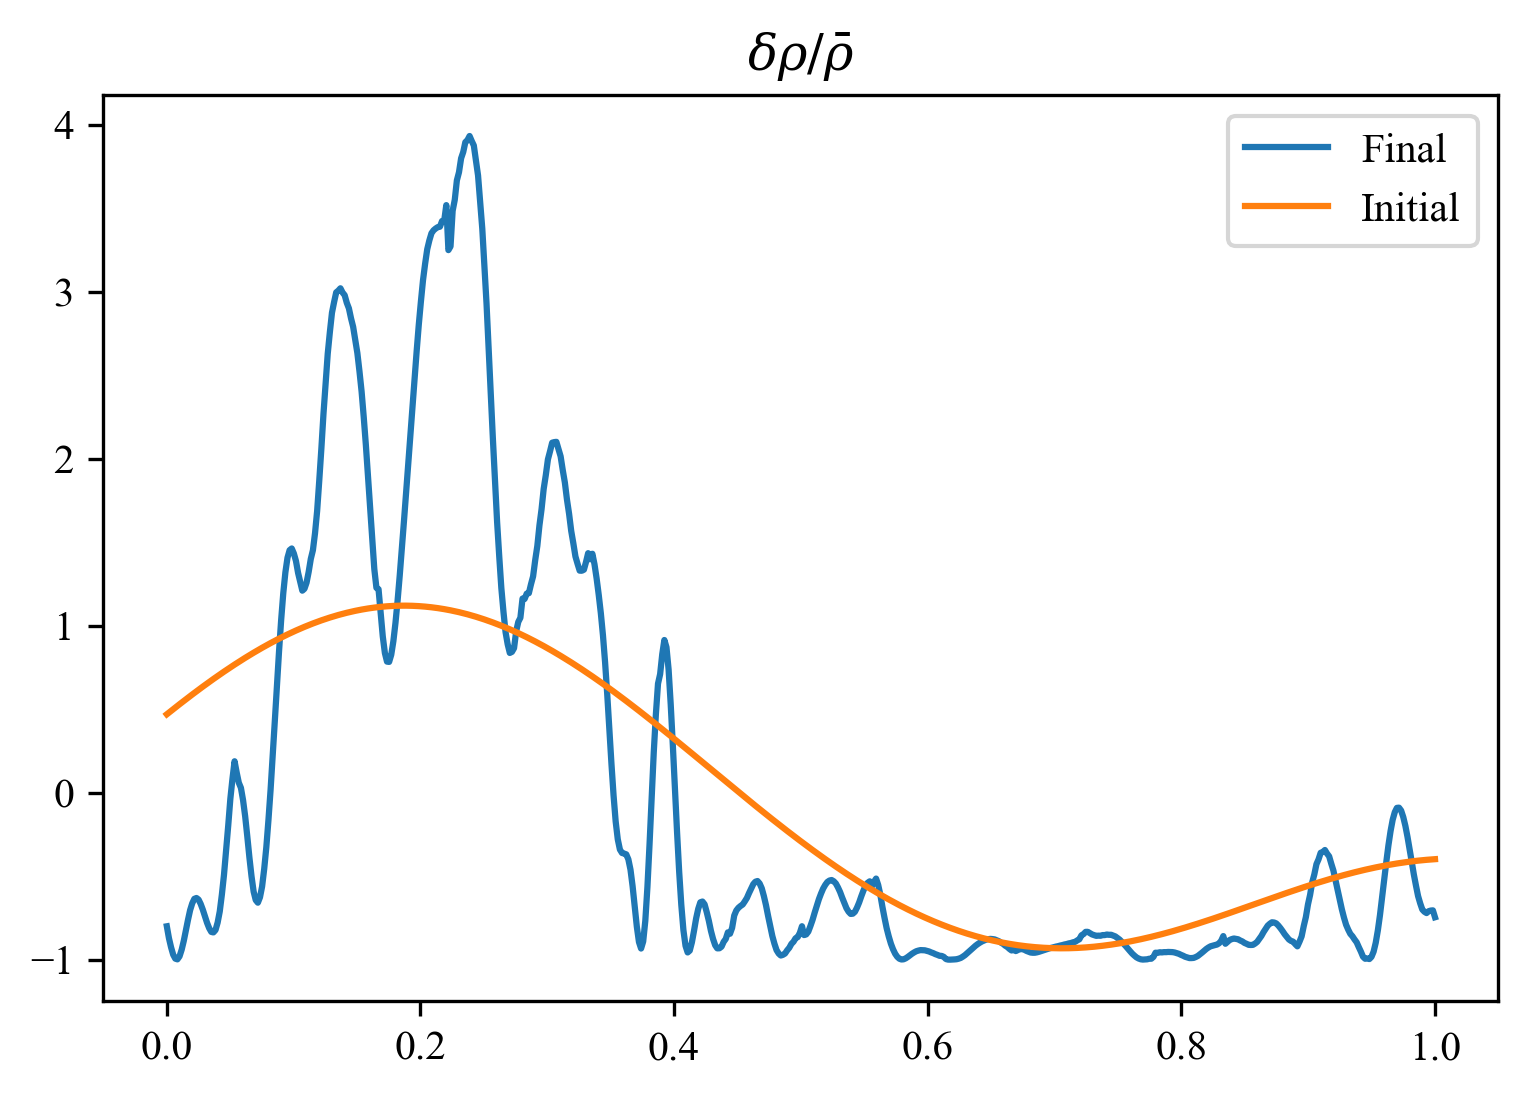

In [39]:
plt.figure(dpi=300)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.title(r"$\delta\rho/\bar{\rho}$")
plt.plot(np.linspace(0, 1, 600),deltaFinal[0,:],label='Final')
plt.plot(np.linspace(0, 1, 600),deltaIni,label='Initial')
plt.legend()

# Edited to here

In [ ]:
plt.figure(dpi=300)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.title(r"$\delta\rho/\bar{\rho}$")
plt.plot(np.linspace(0, 1, 600),delta)

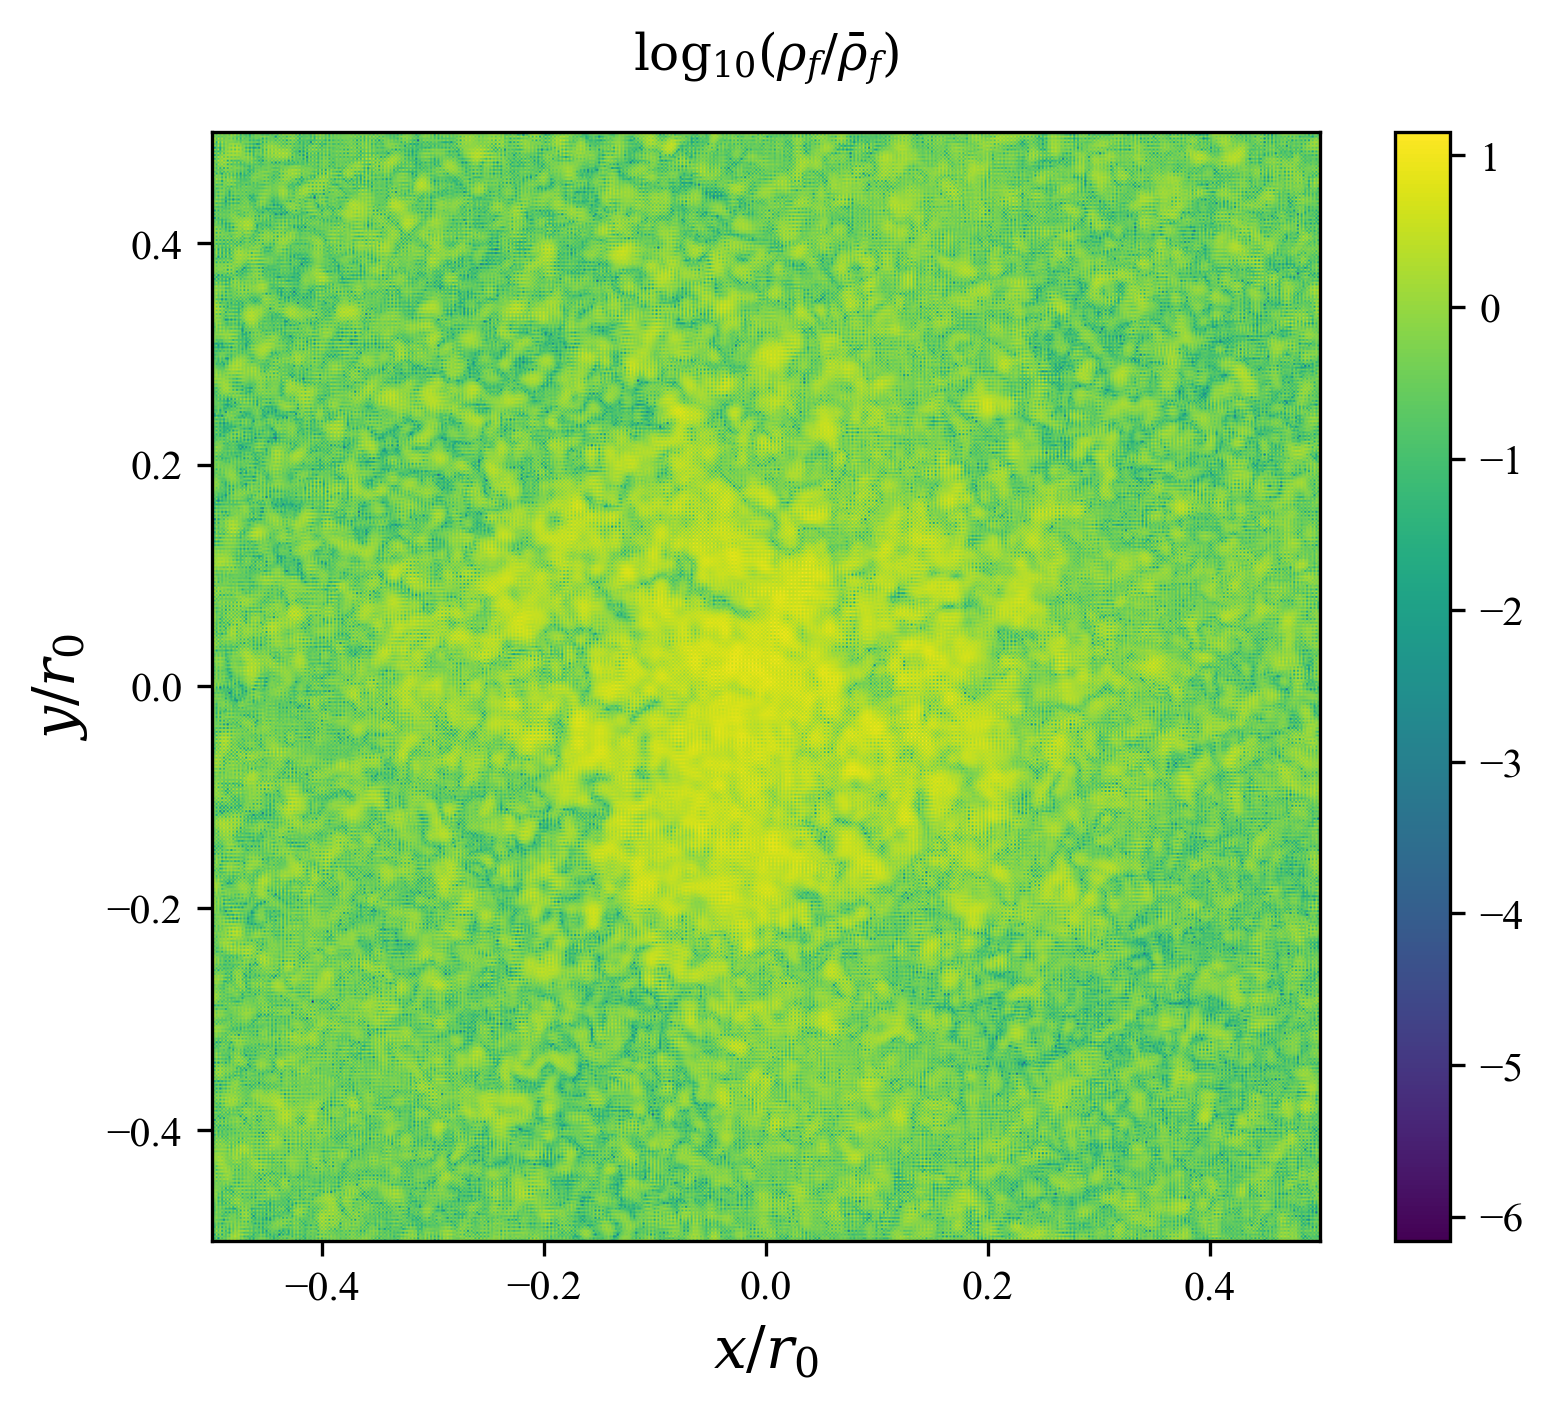

In [41]:
# psi_centered = Center(psi[:,:])
rho_centered = Center(np.abs(psi)**2)
scale = box_size/debroglie_length*factor

plt.figure(dpi=300)
# plt.title(r"$\log_{10}|\psi_f|^2$")
plt.rcParams['axes.facecolor']='white'
plt.title(r"$\log_{10}(\rho_f/\bar{\rho}_f)$", pad = 15)
# plt.imshow((rho_centered), extent=[-scale/2, scale/2, -scale/2, scale/2])#, cmap = "inferno")
plt.imshow(np.log10(Center(np.abs(psiSlices[-1,:,:])**2)/np.average(np.abs(psiSlices[-1,:,:])**2)), extent=[-scale/2, scale/2, -scale/2, scale/2])#, cmap = "inferno")
# plt.plot(halfway, halfway, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", zorder=1)
plt.colorbar()
# plt.clim(-2, 2)
plt.rcParams['axes.facecolor']='white'
plt.xlabel(r"$x/r_0}$", fontsize=14)
plt.ylabel(r"$y/r_{0}$", fontsize=14)
# plt.savefig("Sim-f"+str(resolution)+"g"+str(g_SI/G_N)+".png", facecolor="white", bbox_inches="tight")
plt.show()

In [28]:
np.save( "Simulation Runs//psiSlices"+str(resolution)+"g"+str(g_SI) , psiSlices)
np.save( "Simulation Runs//deltaRMS"+str(resolution)+"g"+str(g_SI), deltas)

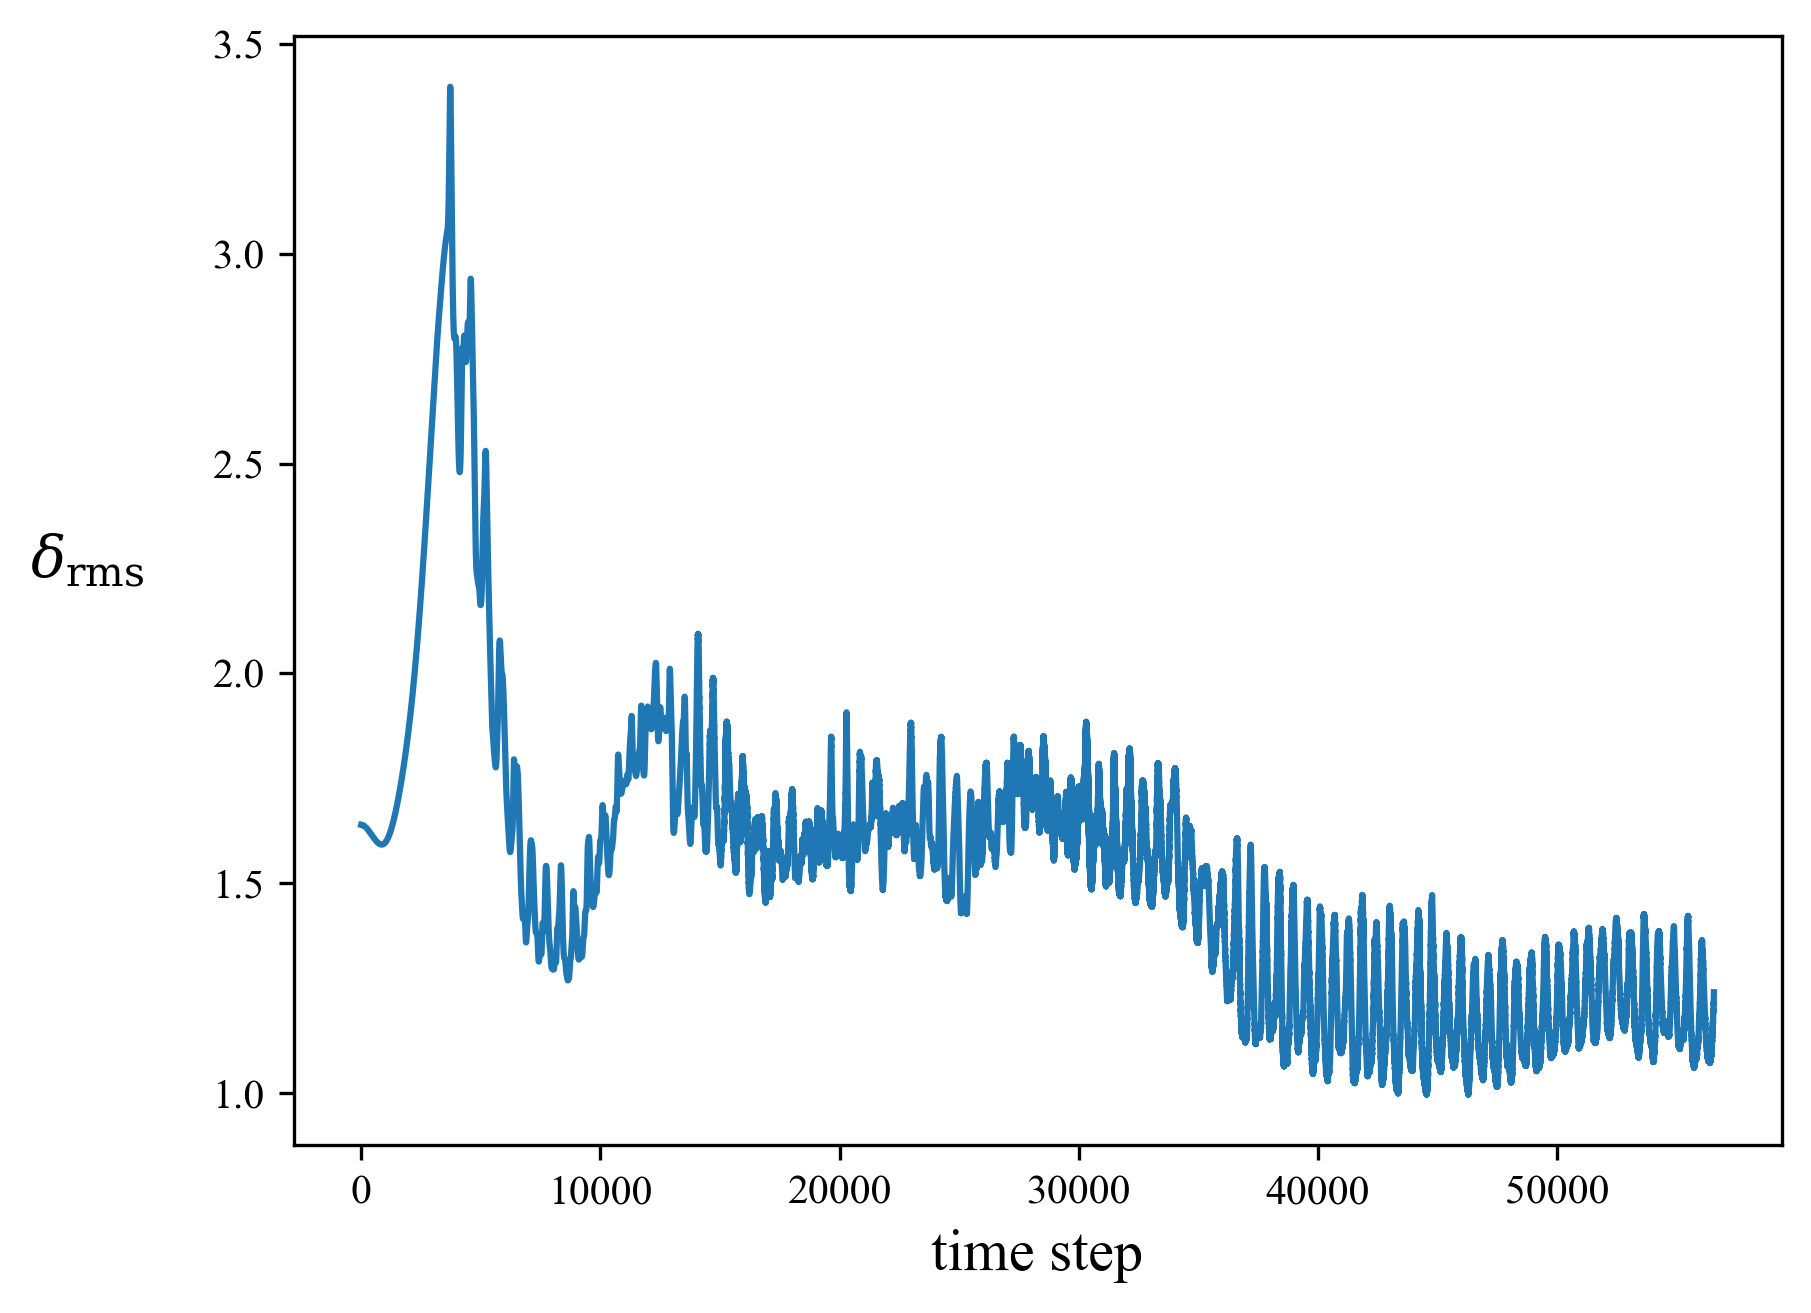

In [42]:
plt.figure(dpi=300)
plt.plot(deltas)
plt.ylabel(r"$\delta_{\mathrm{rms}}$", fontsize=14, rotation = 0, labelpad=30)
plt.xlabel("time step", fontsize=14)
plt.rcParams['axes.facecolor']='white'
plt.savefig("delta-rms"+str(resolution)+"g"+str(g_SI)+".png", facecolor="white", bbox_inches="tight")
plt.show()


## Compute the power spectrum over time

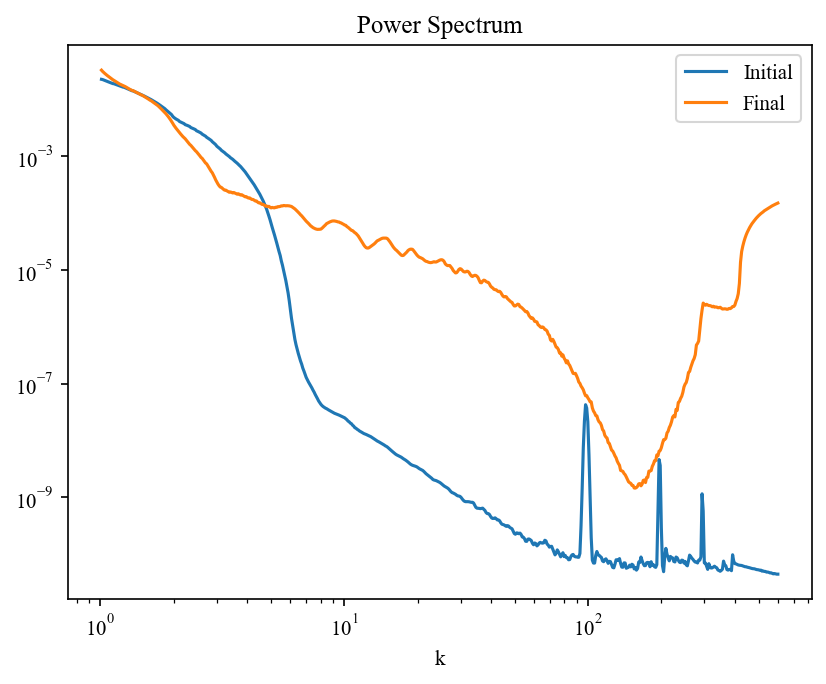

In [43]:
from PowerSpectrum import PowerSpectrum

k_modes0, PS0 = PowerSpectrum((rho0))
# k_modesf, PSf = PowerSpectrum(np.abs(psiSlices[-1,lower:upper,lower:upper])**2)
k_modesf, PSf = PowerSpectrum((np.abs(psi[:,:])**2))

plt.figure(dpi=150)
plt.title("Power Spectrum")
# plt.loglog(k_modes, PS0/PS0[0], label= "Initial")
# plt.loglog(k_modes, PSf/PS0[0], label = "Final")
plt.loglog(k_modes0, PS0, label= "Initial")
plt.loglog(k_modesf, PSf, label = "Final")
plt.xlabel("k")
plt.legend()
plt.rcParams['axes.facecolor']='white'
plt.show()

In [44]:
tshape = Nt
# start = start_time
spectra = np.zeros((tshape , (N)-1))

for i in range(tshape):
#     print(i)
    k_modes, spectra[i, :] = PowerSpectrum(Center(np.abs(psiSlices[i,:,:])**2))
    
avg_spectrum = np.average(spectra, axis=0)
std = np.std(spectra, axis=0)

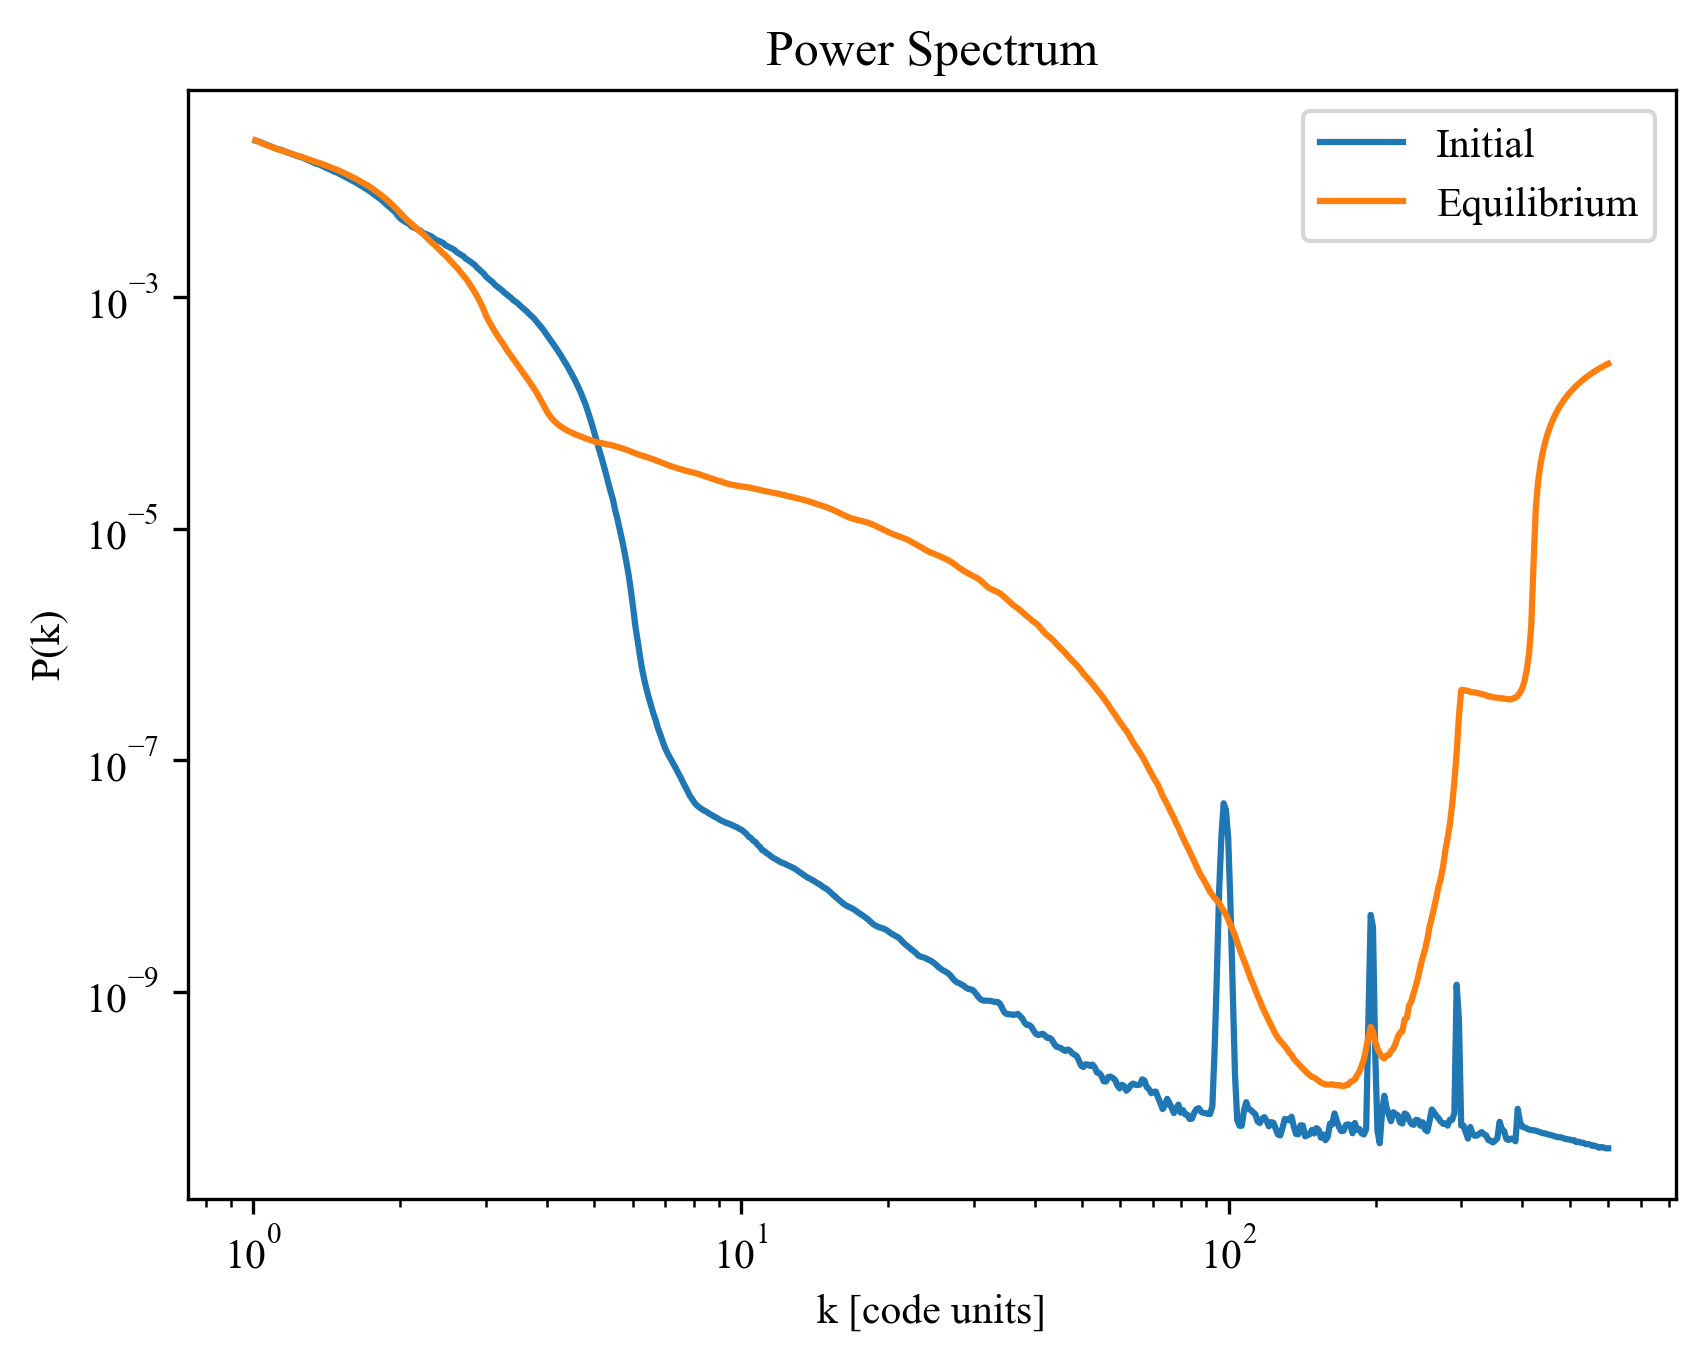

In [45]:
# print(std)
plt.figure(dpi=300)
plt.title("Power Spectrum")
plt.loglog(k_modes, PS0, label= "Initial")
plt.loglog(k_modes, avg_spectrum, label = "Equilibrium")
# plt.loglog(k_modes, avg_spectrum + std)
# plt.loglog(k_modes, avg_spectrum - std)
# plt.fill_between((k_modes[:]), avg_spectrum[:]/PS0[0]-std[:]/PS0[0], avg_spectrum[:]/PS0[0]+std[:]/PS0[0],
#                  alpha=0.9,color="orange", label = r"$1\sigma$")
# plt.plot(k_modes, 0.8*np.exp(-k_modes**2/3000))
# plt.plot(k_modes, 2.5*np.exp(-k_modes**2/3500))
# plt.plot(k_modes, 1200*np.exp(-k_modes**2/150))
plt.xlabel("k [code units]")
plt.ylabel("P(k)")
plt.legend()
plt.rcParams['axes.facecolor']='white'
plt.savefig("PS"+str(resolution)+"g"+str(g_SI)+".png",bbox_inches="tight", facecolor="white")
# plt.ylim(1e-5,1e4)
plt.show()

In [33]:
# np.savetxt("Simulation Runs\PS_N"+str(resolution)+"_g"+str(g_SI)+".csv", spectra ,delimiter=",")
# np.savetxt("Simulation Runs\PSavg_N"+str(resolution)+"_g"+str(g_SI)+".csv", avg_spectrum ,delimiter=",")
#np.savetxt("Simulation Runs\PSkmodes_N"+str(resolution)+"_g"+str(g_SI)+".csv", k_modes ,delimiter=",")

# Time-averaged density profile

In [46]:
from scipy.interpolate import interp2d, RectBivariateSpline

size =  np.shape(psi)[0]
x_vals = np.arange(0, size, 1)
y_vals = np.arange(0, size, 1)
r_vals = np.arange(.0001, int(size/2) , 1 )

rho_r_timeslices = np.empty( ( Nt,  r_vals.size ))
delta_r_timeslices = np.empty( ( Nt,  r_vals.size ))

for k in range(Nt):
    rho = Center(np.abs(psiSlices[k,:,:])**2)
    rho_int = interp2d(x_vals , y_vals, rho)
    rho_r = []
    delta_r = []

    for r in r_vals:
        thetas = np.arange(0, 2*np.pi, 1/r**(1/3) )
        rho_theta = []
        for t in thetas:
            rho_theta.append( rho_int(size/2-r*np.cos(t) , size/2-r*np.sin(t)) )
        rho_r.append( np.average(rho_theta) ) 
        delta_r.append(np.std( rho_theta  ) / np.average(rho_theta))
    rho_r_timeslices[k, :] = rho_r
    delta_r_timeslices[k,:] = delta_r

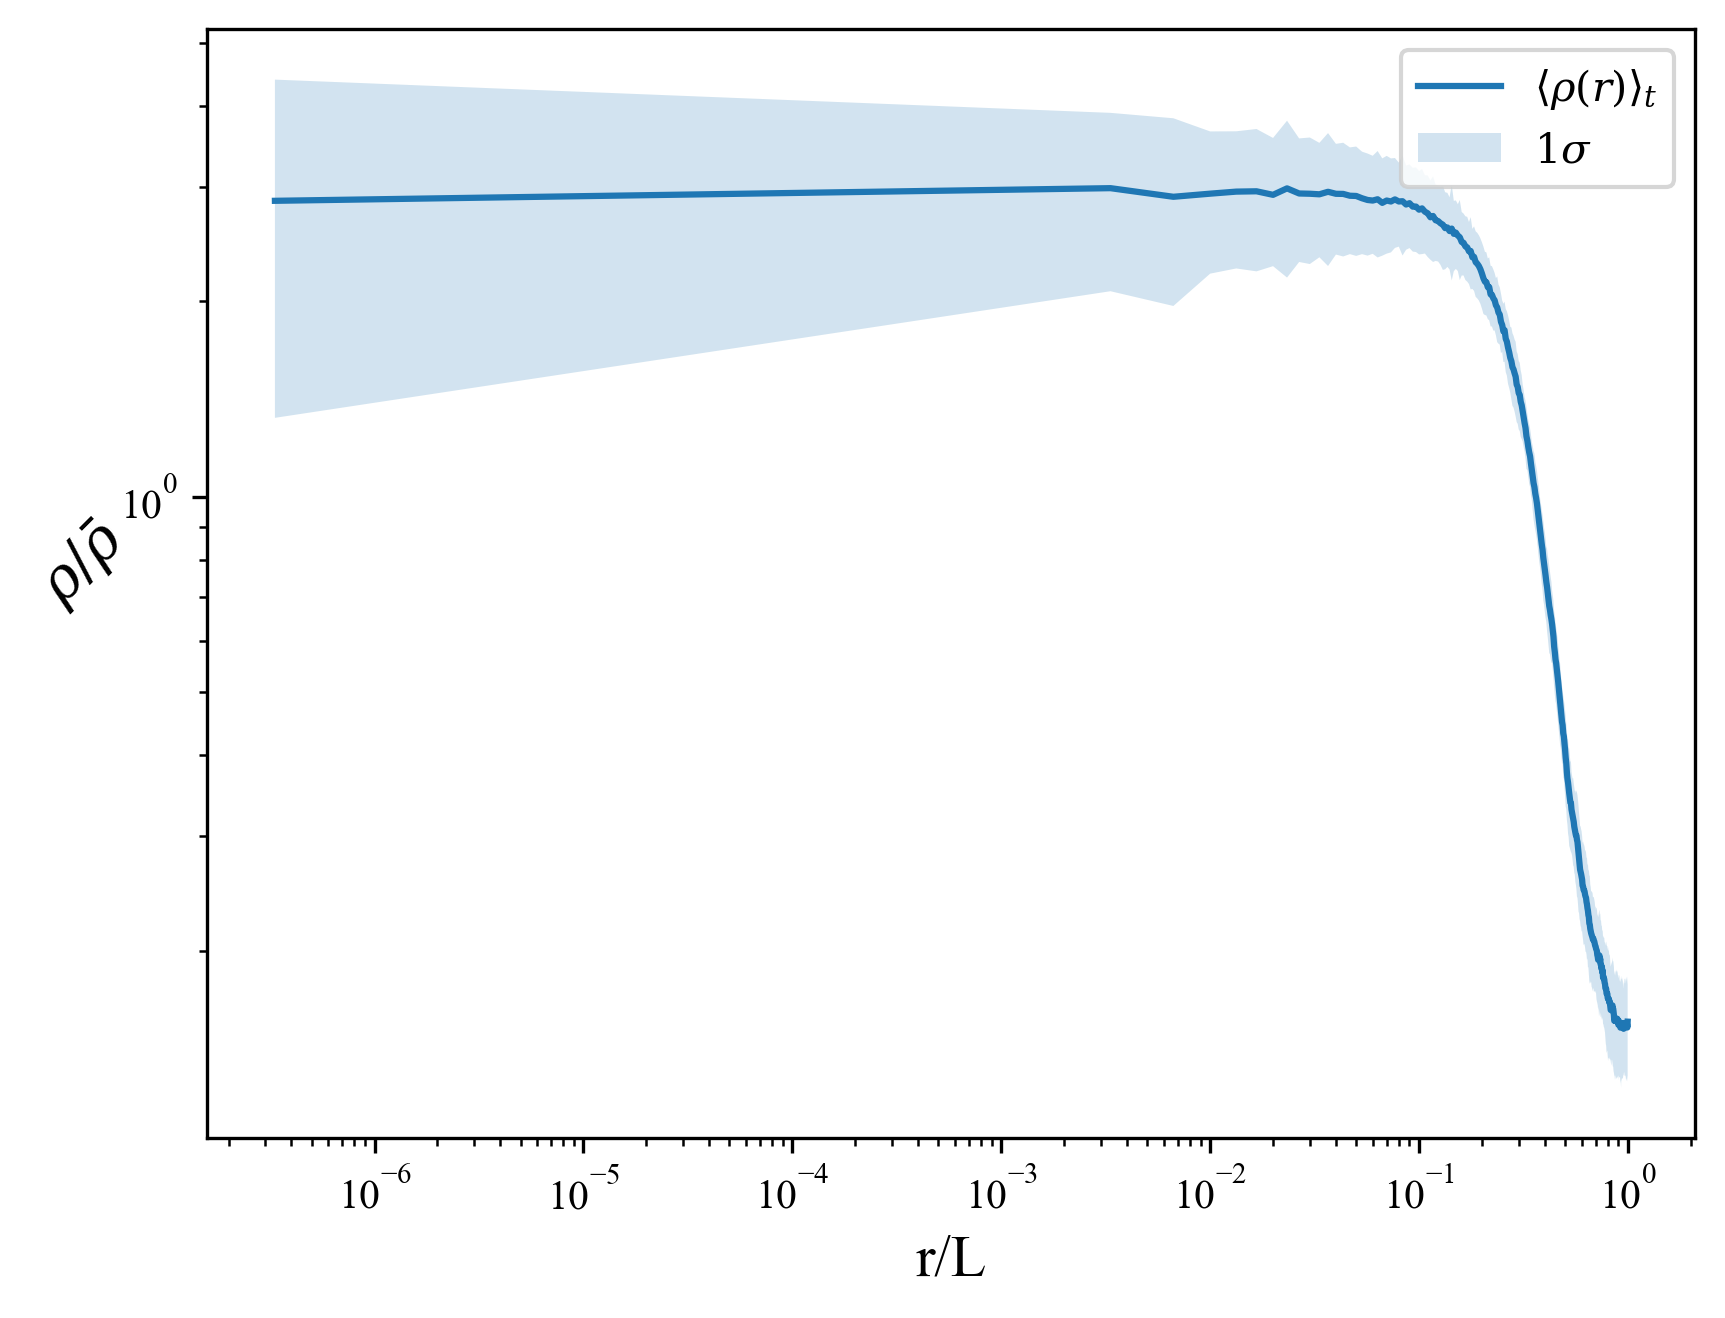

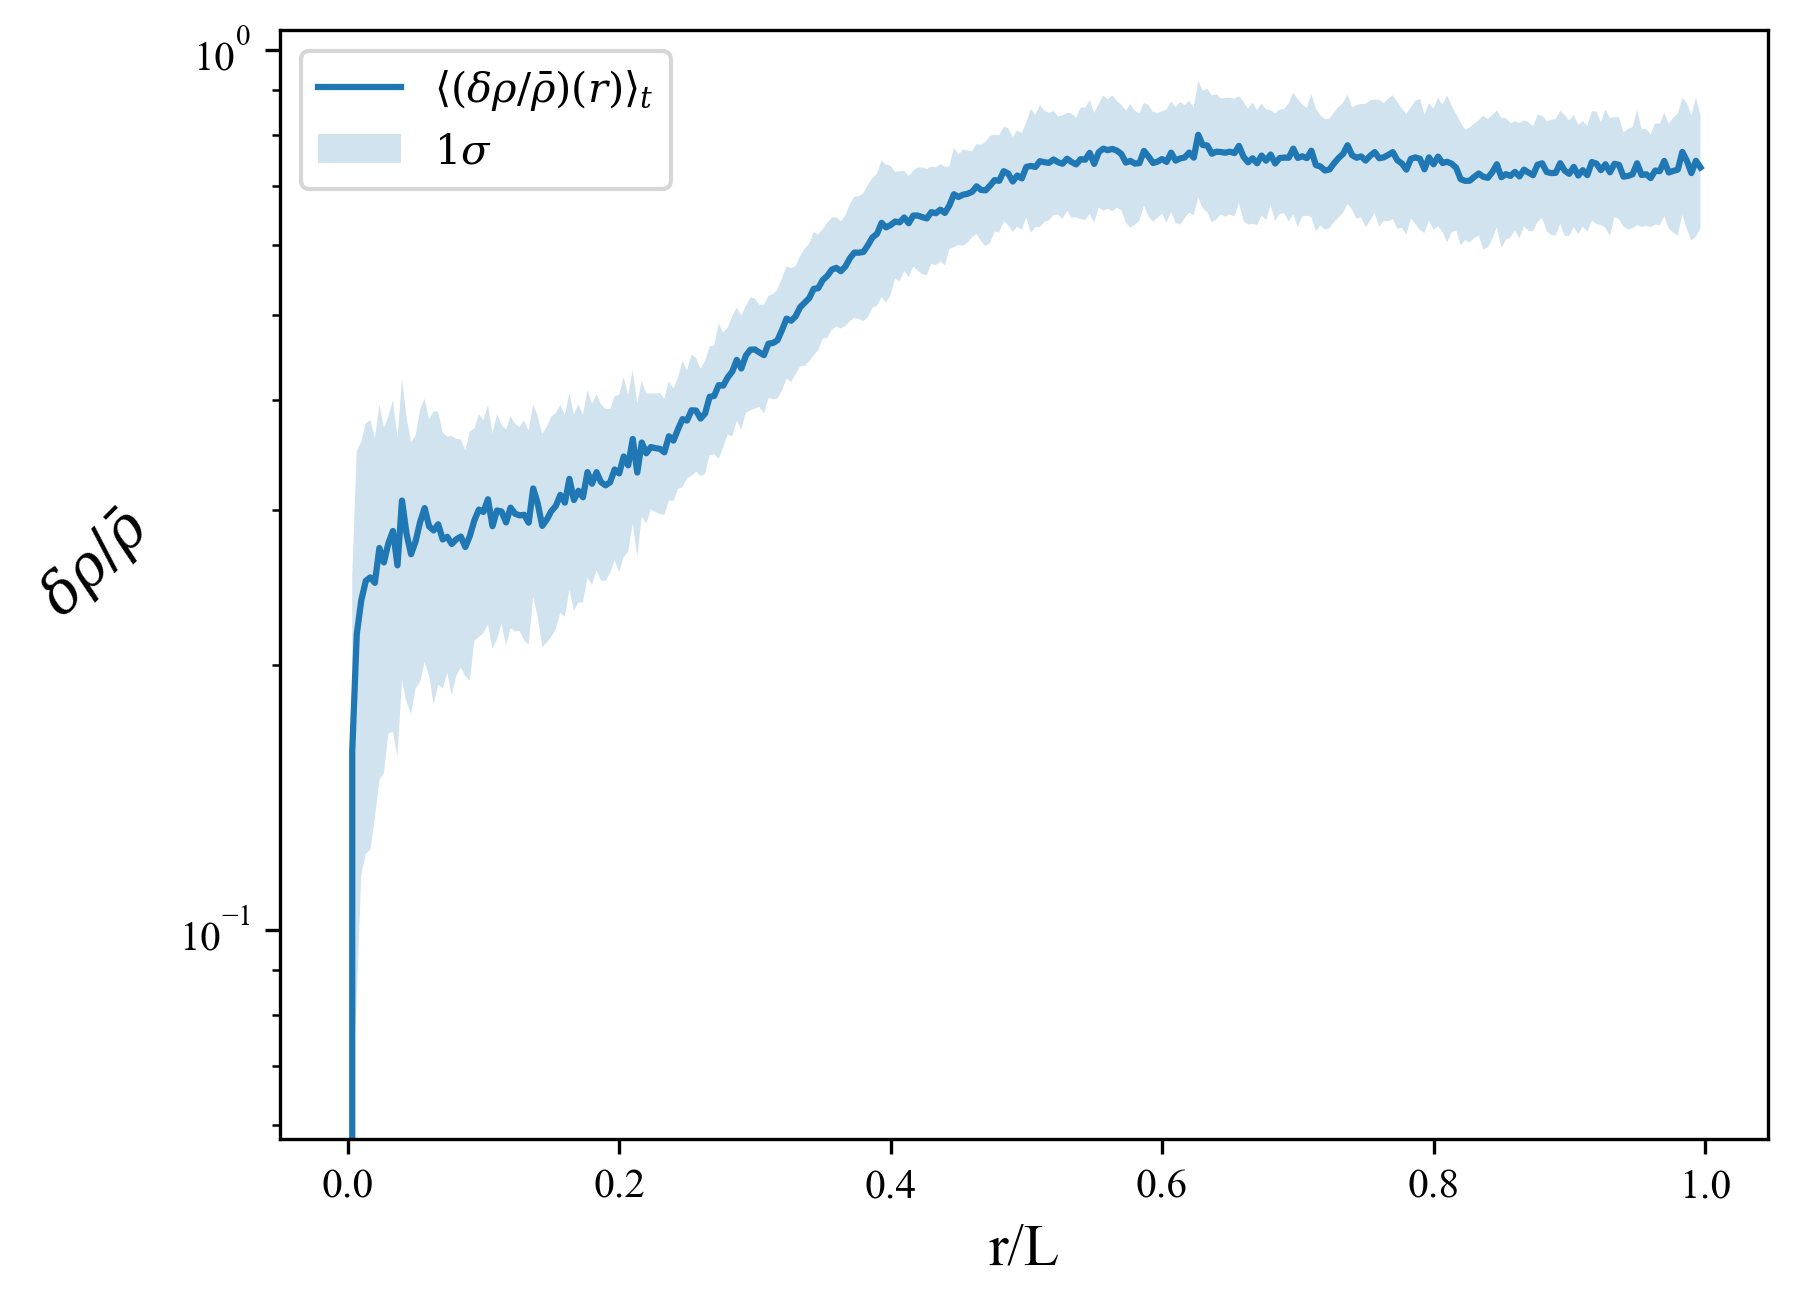

In [47]:
rho_avg = np.mean(rho_r_timeslices, axis = 0)
rho_std = np.std(rho_r_timeslices, axis = 0)
delta_avg = np.mean(delta_r_timeslices, axis = 0)
delta_std = np.std(delta_r_timeslices, axis = 0)

plt.figure(dpi=300)
plt.rcParams['axes.facecolor']='white'
# plt.plot(r_vals, delta_r)
plt.loglog(2*r_vals/size,  rho_avg / np.average(rho_avg) , label=r"$\langle\rho(r)\rangle_t$")
plt.fill_between(2*r_vals/size, (rho_avg-rho_std)/ np.average(rho_avg), (rho_avg+rho_std)/ np.average(rho_avg), alpha=0.2, label = r"$1\sigma$")
# plt.loglog(2*r_vals/size, delta_avg, label=r"$\langle(\delta\rho/\rho)(r)\rangle_t$")
# plt.fill_between(2*r_vals/size, delta_avg-delta_std, delta_avg+delta_std, alpha=0.2, label = r"$1\sigma$")
plt.ylabel(r"$\rho/\bar{\rho}$",fontsize=14, rotation = 45)
plt.xlabel(r"r/L", fontsize=14)
plt.legend()
# plt.xlim(0,.2)
plt.savefig("density-profile"+str(resolution)+"g"+str(g_SI)+".png", bbox_inches="tight", facecolor="white")
plt.show()

plt.figure(dpi=300)
plt.rcParams['axes.facecolor']='white'
plt.semilogy(2*r_vals/size, delta_avg, label=r"$\langle(\delta\rho/\bar{\rho})(r)\rangle_t$")
plt.fill_between(2*r_vals/size, delta_avg-delta_std, delta_avg+delta_std, alpha=0.2, label = r"$1\sigma$")
# plt.plot(r_vals, rho_r)
plt.ylabel(r"$\delta \rho / \bar{\rho}$",fontsize=14, rotation = 45, labelpad=15)
plt.xlabel(r"r/L", fontsize=14)
plt.legend()
# plt.axvline(x=0.001)
plt.savefig("contrast-profile"+str(resolution)+"g"+str(g_SI)+".png", bbox_inches="tight", facecolor="white")
plt.show()

In [36]:
np.save("Simulation Runs//rhoAvg"+str(resolution)+"g"+str(g_SI), rho_avg)
np.save("Simulation Runs//deltaAvg"+str(resolution)+"g"+str(g_SI), delta_avg)

# Calculate  velocity distribution and $v_{\mathrm{rms}}$

/var/folders/sq/h1zpjmyn11j4ck1mhhfcmy0r0000gn/T/ipykernel_41728/1283094707.py:4: RuntimeWarning: overflow encountered in power
  return A *v* np.exp(- (v/sigma)**n)
/var/folders/sq/h1zpjmyn11j4ck1mhhfcmy0r0000gn/T/ipykernel_41728/1283094707.py:4: RuntimeWarning: invalid value encountered in power
  return A *v* np.exp(- (v/sigma)**n)


[ 8.80057657e+03  3.02364669e-04 -3.95938947e+00]
v_rms = 0.985737499535669
v_peak = 7.504372876768492
sigma_v = 0.8904452111342461


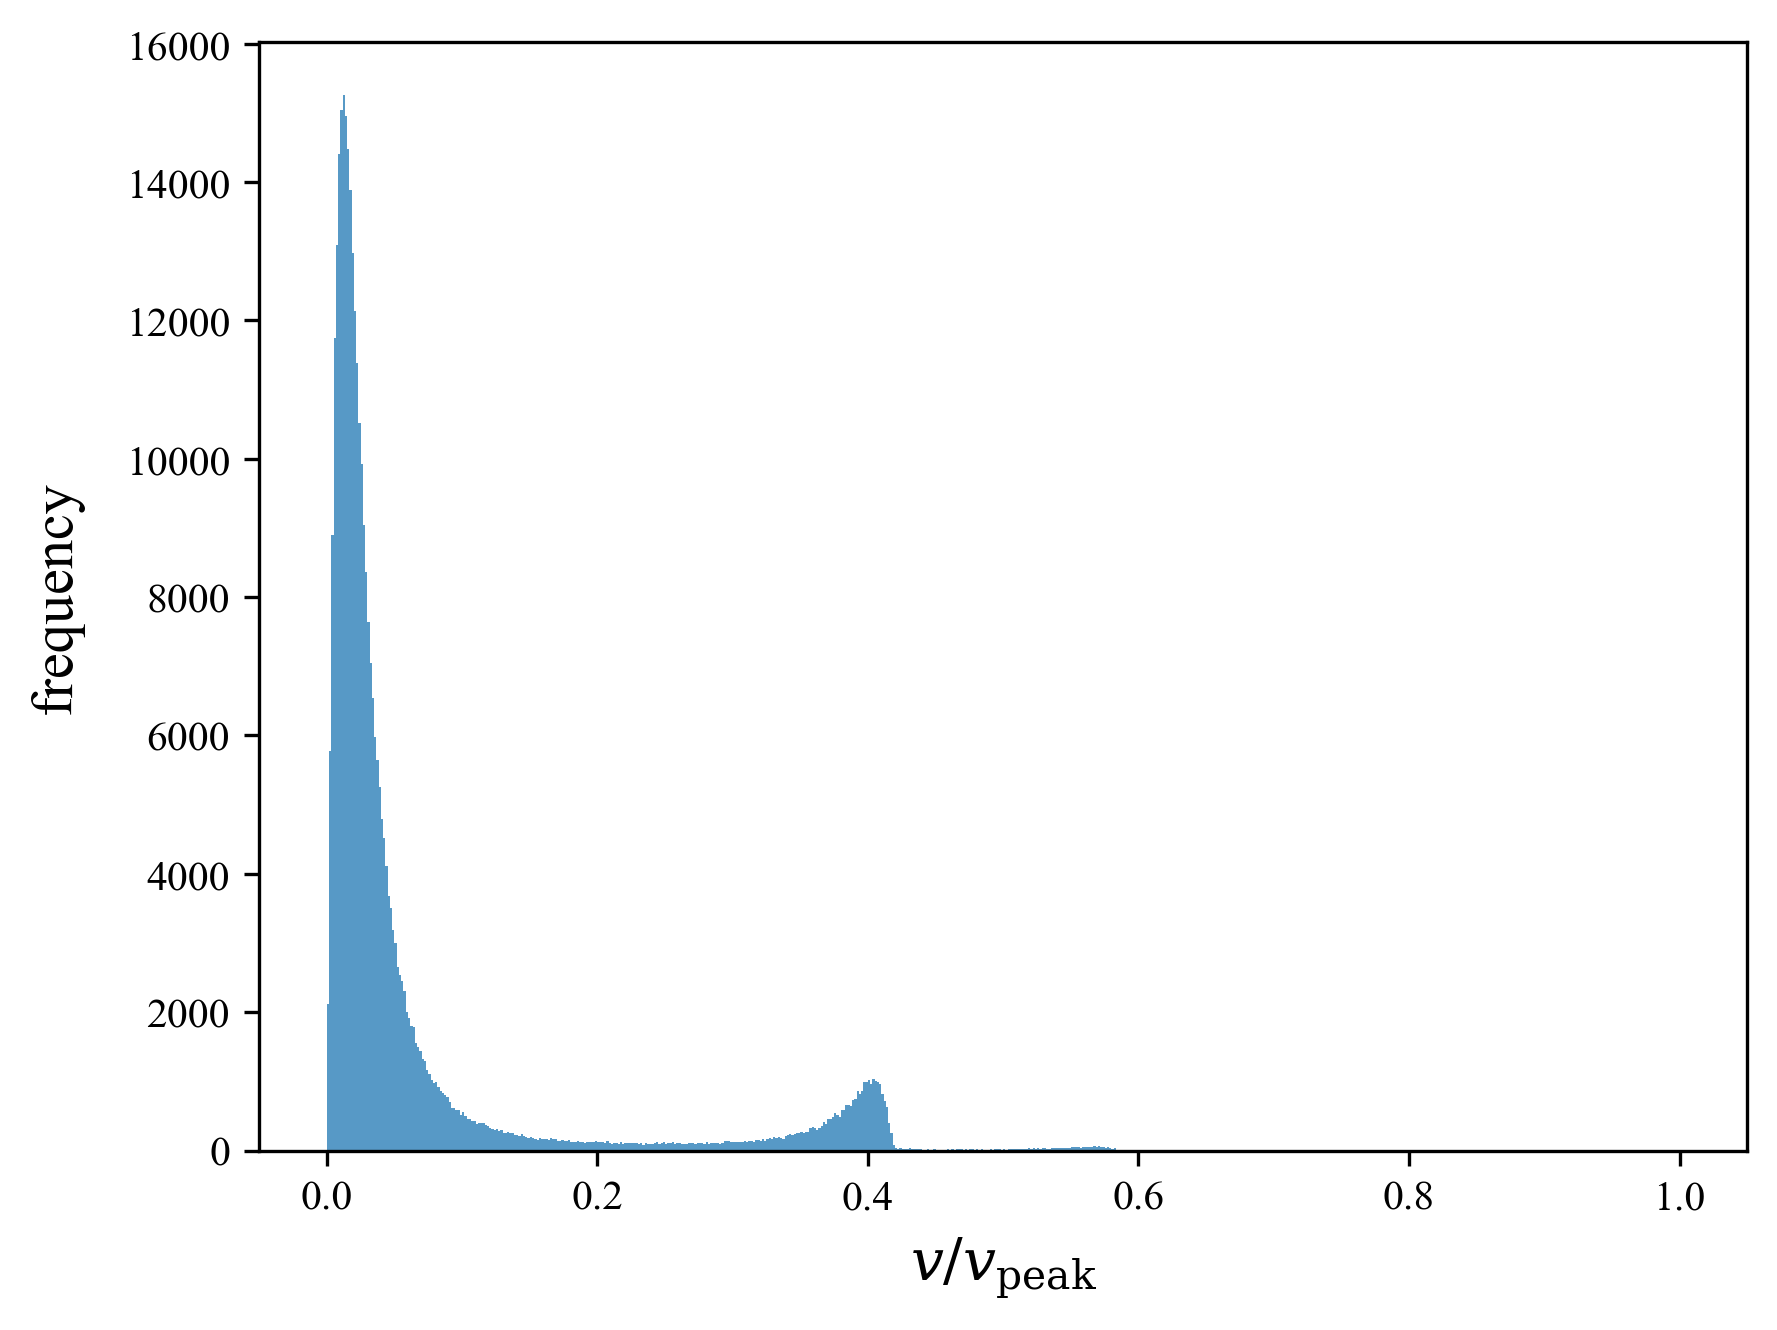

In [51]:
from scipy.optimize import curve_fit

def Maxwell(v , A, sigma, n):
    return A *v* np.exp(- (v/sigma)**n)

phase = np.angle(psiSlices[-1,:,:])
v_y, v_x = np.gradient(phase)


v_mag = np.linalg.norm(np.gradient(phase), axis=0)
v_mag2 = v_mag**2

hist, bins = np.histogram(v_mag, bins=int(resolution**1.))


v_peak = bins[np.argmax(hist)]

v_rms = np.sqrt(np.average(v_mag2))

cut = 50 # index up to which to do curve fit

popt, pcov = curve_fit(Maxwell, bins[1:cut], hist[1:cut], [1000, v_peak, 2])
Dist = Maxwell(bins, popt[0], popt[1], popt[2])
v_peak = bins[np.argmax(Dist)]
sigma_v = np.std(v_mag[:cut])

# v_peak = popt[1]

print(popt)

# plt.figure(dpi=150, figsize=(4,4))
# plt.imshow(v_mag)#,   cmap="gray")
# plt.axis("equal")
# plt.show()

print("v_rms = "+str(v_rms))
print("v_peak = "+str(v_peak))
print("sigma_v = "+str(sigma_v))



plt.figure(dpi=300)
plt.rcParams['axes.facecolor']='white'
plt.hist(v_mag.ravel()/v_peak, bins=int(resolution**1.), log=False, alpha=0.75)
# plt.plot(bins/v_peak, Dist, color="k")
plt.xlabel(r"$v/v_{\mathrm{peak}}$", fontsize=14)
plt.ylabel("frequency", fontsize=14, labelpad=10)
# plt.axvline(x=1, zorder=2, label = "RMS", color = "k", linestyle = "--")
# plt.axvline(x=np.median(v_mag)/v_rms, label = "Median", color='r', linestyle = "--")
# plt.axvline(x=np.mean(v_mag)/v_rms, label = "Mean", color = "g", linestyle = "--")
# plt.axvline(x=v_peak/v_peak, color="red")
# plt.legend()
# plt.xlim(0,6)
# plt.savefig("v-dist"+str(resolution)+"g"+str(g_SI/G_N)+".png", bbox_inches="tight")
# plt.axvline(x=1-(sigma_v/v_peak)/2, color="k", linestyle=":")
# plt.axvline(x=1+(sigma_v/v_peak)/2, color="k", linestyle=":")
# plt.scatter(v_peak/v_peak, hist[np.argmax(hist)], color="red", zorder=3)
# plt.scatter(1, np.max(Dist), color="red", zorder=4)
# plt.axvline(x = bins[cut]/v_peak)
plt.savefig("speed-dist"+str(resolution)+"g"+str(g_SI/G_N)+".png", bbox_inches="tight", facecolor="white")
# plt.xlim(0,40)
plt.show()